<center><h1 class="background-title"> $\text{Machine Learning in Healthcare (097248)}$ </h1>

<h3> $\text{Project : Wisconsin Breast Cancer Dataset}$ </h3>
<h6> $\text{Submitted by : Daniel Engelsman}$ </h6></center>

## $\text{Introduction}$

The following interactive notebook utilizes as an execution platform of my project on the "[Wisconsin Breast Cancer Dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))". \
Today's breast cancer screening can be either X-ray or CT scans, providing a high dimensional raw data that is rich in features :

<center><img src= https://upload.wikimedia.org/wikipedia/commons/8/81/Pulmon_fibrosis.PNG  width="600px" style="width:500px"/></center>

This kind of data is an easy prey for Artificial Neural Networks (ANN). Their inherent ability to find lower dimensional\
 representations and learn to distinguish between them, turns them into the most efficient classifiers.

<!-- ### Dataset Specification -->
However here, the dataset was released long ago $( \, 01 / 11 / 1995 \, )$ at significantly lower resolution,\
 consist of a digitized image of a fine needle aspirate ([FNA](https://en.wikipedia.org/wiki/Fine-needle_aspiration)) :
<!-- back in the days when web traffic was not even a term : -->
 <center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Machine-Learning-Project/Images/Benign_Malignant.png?raw=true" width="800px" style="width:500px"/></center>

In the absence of any advanced computational equipment, scientists were busy first with extraction of meaningful\
 features at lower dimensionality, in attempt to distinguish between the samples :

<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Machine-Learning-Project/Images/diagnosis.png?raw=true" width="800px" style="width:500px"/></center>

Interestingly, several subtle differences were found, and thereby encouraged the research groups to further understand\
 what are the dominant key points that affect the decision rule.

<!-- However, in this work I aim to challenge the ANN approach by performing a comprehensive research around the data, and then explore different classification models, using classic ML tools only. -->

#### $\text{ Intention Statement }$

> In this project I would like to analyze and explore the data thoroughly, in search of hidden patterns using\
 merely unsupervised classification methods, that are not deep learning.
 
#### $\text{ Pipeline Workflow }$

Generally speaking, the project workflow will be consisted as follows  :

<center><img src="https://github.com/Daniboy370/Machine-Learning/blob/master/Machine-Learning-Project/Images/Pipeline.png?raw=true" width="800px" style="width:800px" /></center>

<!-- In a supervised learning model, the learning process is performed on a labeled dataset that acts as a ground-truth to evaluate progress.
Contrarily, an unsupervised model receives an unlabeled data and its algorithm tries to make sense of by extracting features into unknown structures (without being constrained to the labels). -->

## $\text{Exploratory Data Analysis (EDA)}$

In this section I will analyze the dataset to come up with the main characteristics that could shed light\
 on the nature of the data, presented mostly visually. The analysis will assist to find out which features are\
 more crucial in predicting whether a sample is cancerous or not. 

$\bullet \ $ **NOTE :** Along the notebook the code is hidden for aesthetic reasons (*double click* to open).

In [689]:
#@title

import os
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
from google.colab import widgets
from math import pi
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

plt.rcParams['figure.figsize'] = (5.0, 5.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 90  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Loading the data
url = 'https://raw.githubusercontent.com/Daniboy370/Machine-Learning/master/Machine-Learning-Project/Breast%20Cancer%20Wisconsin%20Dataset.csv'
df = pd.read_csv(url)

## Print the number of rows in the data set
df_rows, df_cols = df.shape
print('Table size : {} x {}'.format(df_rows, df_cols) )

ix_mn, ix_se, ix_wt = [*range(2, 12, 1)], [*range(12, 22, 1)], [*range(22, 32, 1)]

class_feat = ['Radius', 'Texture', 'Perimeter', 'Area', 'Smoothness', 'Compactness', 'Concavity', 'Concave points', 'Symmetry', 'Fractal dim.']
df_class = pd.DataFrame(class_feat, columns = ['Class'])
null_df1 = pd.DataFrame(df.iloc[:, ix_mn].isnull().sum(), columns = ['NaN'])
null_df2 = pd.DataFrame(df.iloc[:, ix_se].isnull().sum(), columns = ['NaN'])
null_df3 = pd.DataFrame(df.iloc[:, ix_wt].isnull().sum(), columns = ['NaN'])

# put label encoder before
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()         # label encoding
df['diagnosis'] = le.fit_transform( df['diagnosis'] )
rndperm = np.random.permutation(df_mn.shape[0])
X, y = df.iloc[rndperm, 2:], df.iloc[rndperm, 1]

df_NaN = df_class
df_NaN['Mean'], df_NaN['SE'], df_NaN['Worst'] = null_df1.to_numpy(), null_df2.to_numpy(), null_df3.to_numpy()

# ---- Missing Values Warning ---- #
if (df_NaN.iloc[:, 1:4].sum() != 0).any():
    print('Warning ! deteced missing values !')


# ----------------------------------------------------- #
# ----------- Import from Drive environment ----------- #
# from google.colab import drive
# PATH_mount = '/content/gdrive'
# drive.mount(PATH_mount)

# # ------- Change to working directory ------- #
# PATH_dir = '/My Drive/Colab Notebooks/Proj-ML'
# os.chdir(PATH_mount + PATH_dir)

# url = 'https://github.com/Daniboy370/Machine-Learning/blob/master/Machine-Learning-Project/wdbc.csv'
# df = pd.read_csv('Wisconsin Breast Cancer Dataset.csv')
# ----------------------------------------------------- #

Table size : 569 x 32


First of all, the data's propriety should be checked for NaN or missing values :

In [690]:
df_NaN

,Class,Mean,SE,Worst
0,Radius,0,0,0
1,Texture,0,0,0
2,Perimeter,0,0,0
3,Area,0,0,0
4,Smoothness,0,0,0
5,Compactness,0,0,0
6,Concavity,0,0,0
7,Concave points,0,0,0
8,Symmetry,0,0,0
9,Fractal dim.,0,0,0


After found valid, we can use the full dataset : $ D = \{ x_i, y_i \}_{i=1}^{n=569}$
<!-- Consider ten random rows of the raw-data : -->

In [691]:
df.sample(10)        # Show ten random samples

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,869931,0,13.740,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,0.1473,0.05580,0.2500,0.7574,1.573,21.470,0.002838,0.015920,0.017800,0.005828,0.01329,0.001976,15.34,22.46,97.19,725.9,0.09711,0.18240,0.156400,0.06019,0.2350,0.07014
104,862989,0,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,0.06481,0.3550,1.5340,2.302,23.130,0.007595,0.022190,0.028800,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.03203,0.2826,0.07552
474,911391,0,10.880,15.62,70.41,358.9,0.10070,0.10690,0.051150,0.015710,0.1861,0.06837,0.1482,0.5380,1.301,9.597,0.004474,0.030930,0.027570,0.006691,0.01212,0.004672,11.94,19.35,80.78,433.1,0.13320,0.38980,0.336500,0.07966,0.2581,0.10800
26,852763,1,14.580,21.53,97.41,644.8,0.10540,0.18680,0.142500,0.087830,0.2252,0.06924,0.2545,0.9832,2.110,21.050,0.004452,0.030550,0.026810,0.013520,0.01454,0.003711,17.62,33.21,122.40,896.9,0.15250,0.66430,0.553900,0.27010,0.4264,0.12750
269,8910720,0,10.710,20.39,69.50,344.9,0.10820,0.12890,0.084480,0.028670,0.1668,0.06862,0.3198,1.4890,2.230,20.740,0.008902,0.047850,0.073390,0.017450,0.02728,0.007610,11.69,25.21,76.51,410.4,0.13350,0.25500,0.253400,0.08600,0.2605,0.08701
327,895299,0,12.030,17.93,76.09,446.0,0.07683,0.03892,0.001546,0.005592,0.1382,0.06070,0.2335,0.9097,1.466,16.970,0.004729,0.006887,0.001184,0.003951,0.01466,0.001755,13.07,22.25,82.74,523.4,0.10130,0.07390,0.007732,0.02796,0.2171,0.07037
274,8911163,1,17.930,24.48,115.20,998.9,0.08855,0.07027,0.056990,0.047440,0.1538,0.05510,0.4212,1.4330,2.765,45.810,0.005444,0.011690,0.016220,0.008522,0.01419,0.002751,20.92,34.69,135.10,1320.0,0.13150,0.18060,0.208000,0.11360,0.2504,0.07948
91,861799,1,15.370,22.76,100.20,728.2,0.09200,0.10360,0.112200,0.074830,0.1717,0.06097,0.3129,0.8413,2.075,29.440,0.009882,0.024440,0.045310,0.017630,0.02471,0.002142,16.43,25.84,107.50,830.9,0.12570,0.19970,0.284600,0.14760,0.2556,0.06828
140,868999,0,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.000000,0.1903,0.06422,0.1988,0.4960,1.218,12.260,0.006040,0.005656,0.000000,0.000000,0.02277,0.003220,10.62,14.10,66.53,342.9,0.12340,0.07204,0.000000,0.00000,0.3105,0.08151
397,90401602,0,12.800,17.46,83.05,508.3,0.08044,0.08895,0.073900,0.040830,0.1574,0.05750,0.3639,1.2650,2.668,30.570,0.005421,0.034770,0.045450,0.013840,0.01869,0.004067,13.74,21.06,90.72,591.0,0.09534,0.18120,0.190100,0.08296,0.1988,0.07053


### $\hspace{7cm} \ \text{Data Composition}$

$\underline{\text{Dataset}} : \ \dim(X) = ( \underset{\text{case :}}{569 \times 10}) \times \underset{\text{a, b, c}}{3}$

$\underline{\text{Dependent (explained) Variable}} \ \big( \hspace{2mm} y_i = \{0,1  \} \hspace{2mm} \big)$
*   **Diagnosis** - Cancer indication whether a sample is Benign $(B = 0)$ or Malignant $(M = 1)$.

$\underline{\text{Independent (explanatory) Variable}} \,\ \big( \hspace{2mm} x_i \in \mathbb{R}^{10} \hspace{2mm} \big)$
* **Radius** - mean of distances from center to points on the perimeter.
* **Texture** - standard deviation of gray-scale value.
* **Perimeter** - $P = \sum_{i=1}^n l_i \hspace{39.25mm}$ (Given  $n$  vertices)
* **Area** - $\hspace{7mm} A = \frac{1}{2} \big( \sum_j w_j z_{j+1} - z_{j} w_{j+1} \big) \quad$ (Given  $n$  vertices on WZ plane)
* **smoothness** - Local variation in radius lengths.
* **compactness** - ($P^2$ / $A$ - 1.0)
* **concavity** - Severity of concave portions of the contour.
* **concave points** - Number of concave portions of the contour.
* **symmetry** - Relative difference of two half-planes.
* **fractal dimension** - ("coastline approximation" - 1)

$\underline{10}$ real-valued features were computed for each cell nucleus in $\underline{3}$ different cases :

**a** $:=$ Mean $(\mu) \ \in \ \mathbb{R}^{10} \hspace{1cm}$
**b** $:=$ SE $(\frac{\sigma}{\sqrt{n}}) \ \in \ \mathbb{R}^{10} \hspace{1cm}$
**c** $:=$ Worst (mean of 3 largest values) $\ \in \ \mathbb{R}^{10}$

Feature | Mean | SE | Worst
--- | --- | --- | ---
1.Radius | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$
$\quad \cdots$ | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$
10.Fractal dim. | $\quad \vdots$ |  $\ \vdots$ |  $\quad \vdots$

<!-- Resulting in a total feature row of $\ \mathbb{R}^{3 \cdot 10=30}$ -->

Let us analyze the **three** different cases $\, \big( \text{a} $ = mean,$\ \text{b}$ = SE$, \ \text{c}$ = worst $\big)$ with respect to **four** aspects $\big( \ \mu, \sigma, \underset{x}{\min}(), \underset{x}{\max}() \ \big)$ :

### $\text{Prevalence of diagnosis}$

The binary target variable $\big($ <font color='blue'>  **B** </font> $\ / \ $ <font color='orange'>  **M** </font> $\big)$ can act as a helpful tool to better understand the data distribution :


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


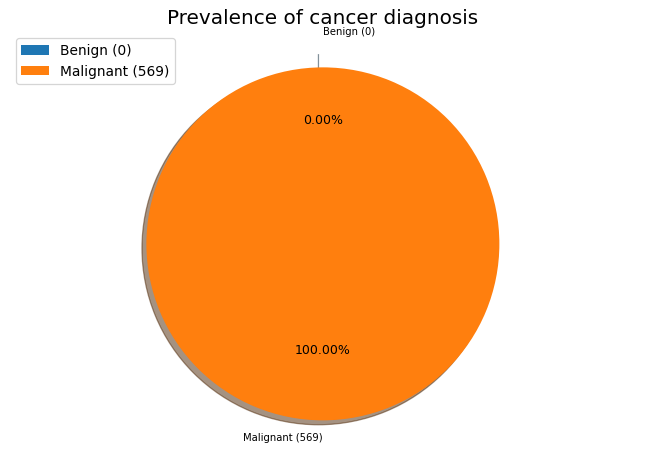

In [692]:
#@title

sum_B = (df['diagnosis']=='B').sum()
sum_M = df_rows - sum_B
frac_B = sum_B/df_rows
frac_M = 1 - frac_B
labels = 'Benign ('+str(sum_B)+')', 'Malignant ('+str(sum_M)+')'
sizes = [frac_B, frac_M]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(9, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
ax1.set_title('Prevalence of cancer diagnosis', fontsize=16)
ax1.axis('equal')
ax1.legend(fontsize=11, loc=2)
plt.show()

Despite not being perfectly equal, the data imbalance can be said to be reasonable.

In [693]:
#@title
df_full = pd.DataFrame(class_feat, columns=['Aspcet'])
df_full['Mean_a'] = (df.iloc[:, ix_mn].mean()).values
df_full['Mean_b'] =  (df.iloc[:, ix_se].mean()).values
df_full['Mean_c'] =  (df.iloc[:, ix_wt].mean()).values

df_full['std_a'] = (df.iloc[:, ix_mn].std()).values
df_full['std_b'] =  (df.iloc[:, ix_se].std()).values
df_full['std_c'] =  (df.iloc[:, ix_wt].std()).values

df_full['Min_a'] = (df.iloc[:, ix_mn].min()).values
df_full['Min_b'] =  (df.iloc[:, ix_se].min()).values
df_full['Min_c'] =  (df.iloc[:, ix_wt].min()).values

df_full['Max_a'] = (df.iloc[:, ix_mn].max()).values
df_full['Max_b'] =  (df.iloc[:, ix_se].max()).values
df_full['Max_c'] =  (df.iloc[:, ix_wt].max()).values

df_full.transpose()

,0,1,2,3,4,5,6,7,8,9
Aspcet,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,Concave points,Symmetry,Fractal dim.
Mean_a,14.1273,19.2896,91.969,654.889,0.0963603,0.104341,0.0887993,0.0489191,0.181162,0.0627976
Mean_b,0.405172,1.21685,2.86606,40.3371,0.00704098,0.0254781,0.0318937,0.0117961,0.0205423,0.0037949
Mean_c,16.2692,25.6772,107.261,880.583,0.132369,0.254265,0.272188,0.114606,0.290076,0.0839458
std_a,3.52405,4.30104,24.299,351.914,0.0140641,0.0528128,0.0797198,0.0388028,0.0274143,0.00706036
std_b,0.277313,0.551648,2.02185,45.491,0.00300252,0.0179082,0.0301861,0.00617029,0.00826637,0.00264607
std_c,4.83324,6.14626,33.6025,569.357,0.0228324,0.157336,0.208624,0.0657323,0.0618675,0.0180613
Min_a,6.981,9.71,43.79,143.5,0.05263,0.01938,0,0,0.106,0.04996
Min_b,0.1115,0.3602,0.757,6.802,0.001713,0.002252,0,0,0.007882,0.0008948
Min_c,7.93,12.02,50.41,185.2,0.07117,0.02729,0,0,0.1565,0.05504


The above table is only a short list of functions that can be helpful in providing some knowledge about the data.\
I chose to focus on the most informative one - the **mean** function, as it delivers a clear comparison between the **centres**. \
However, the **range** of the raw data varies widely thanks to several elements, so appropriate normalization is required.

### $\text{Rescaling (min-max normalization)}$

For convenience the dataset will be shifted to the minimum value, and then normalized by its range such that $\ \hat{X} \in [0, 1]$ . \
This will also remove the dimensional units, and will ease the $\ (B/M) \ $ comparison with respect to a common mean :

$$ \hat{X} = \frac{ X - \text{min}(X) }{ \text{max}(X) - \text{min}(X)} \ \in \ \mathbb{R}^{569 \times 10} $$

Now calculate the mean of $\ \hat{X} \ $, and compare between the two subgroups $\ $:  $\ \hat{\overline{X}^a}_{\{ y=M \}} \ \text{vs.} \ \hat{\overline{X}^a}_{\{ y=B \}} \ $ :


<!-- $$ X^a_{\{ y=M \}}  \oslash \ \overline{X}^a \ \in \ \mathbb{R}^{10} \hspace{1.85cm} \cdot \oslash := \text{element-wise division}$$ -->

<!-- $$ \sum_{i \ \in \ (y {=M})} x_i^a \ \oslash \ \overline{X}^a \ \in \ \mathbb{R}^{10} \hspace{1.85cm} \cdot \oslash := \text{element-wise division}$$ -->

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.6/dist-packages/matplotlib/projections/polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


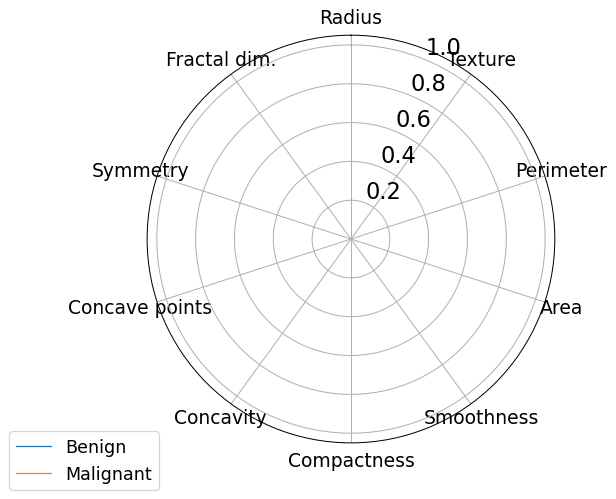

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

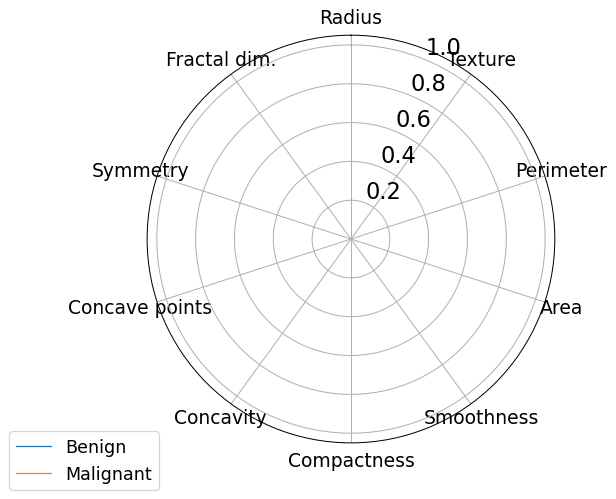

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

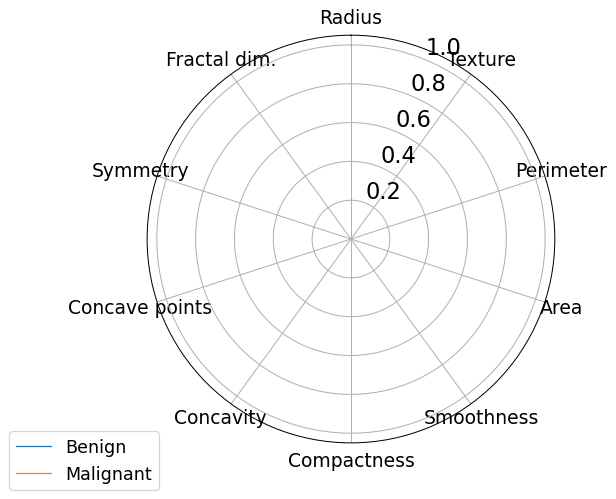

<IPython.core.display.Javascript object>

In [694]:
#@title

# https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

mean_A, max_B, mean_C = df.iloc[:, ix_mn].mean(), df.iloc[:, ix_se].mean(), df.iloc[:, ix_wt].mean()
dx_A = df.iloc[:, ix_mn].max() - df.iloc[:, ix_mn].min()
dx_B = df.iloc[:, ix_se].max() - df.iloc[:, ix_se].min()
dx_C = df.iloc[:, ix_wt].max() - df.iloc[:, ix_wt].min()

A_B = (( df[df['diagnosis']=='B'].iloc[:, ix_mn] - df.iloc[:, ix_mn].min())/dx_A).mean()
A_M = (( df[df['diagnosis']=='M'].iloc[:, ix_mn] - df.iloc[:, ix_mn].min())/dx_A).mean()

B_B = (( df[df['diagnosis']=='B'].iloc[:, ix_se] - df.iloc[:, ix_se].min())/dx_B).mean()
B_M = (( df[df['diagnosis']=='M'].iloc[:, ix_se] - df.iloc[:, ix_se].min())/dx_B).mean()

C_B = (( df[df['diagnosis']=='B'].iloc[:, ix_wt] - df.iloc[:, ix_wt].min())/dx_C).mean()
C_M = (( df[df['diagnosis']=='M'].iloc[:, ix_wt] - df.iloc[:, ix_wt].min())/dx_C).mean()

def plot_data(B, M):
    # Using Panda dataframe
    df = pd.DataFrame({
    'Diagnosis': ['Benign', 'Malignant'],
    class_feat[0] : [ B[0] , M[0] ],
    class_feat[1] : [ B[1] , M[1] ],
    class_feat[2] : [ B[2] , M[2] ],
    class_feat[3] : [ B[3] , M[3] ],
    class_feat[4] : [ B[4] , M[4] ],
    class_feat[5] : [ B[5] , M[5] ],
    class_feat[6] : [ B[6] , M[6] ],
    class_feat[7] : [ B[7] , M[7] ],
    class_feat[8] : [ B[8] , M[8] ],
    class_feat[9] : [ B[9] , M[9] ],
    })

    # General details
    N = len(B)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    values=df.loc[0].drop('Diagnosis').values.flatten().tolist()
    values += values[:1]
    ax = plt.subplot(111, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(angles, fontsize=14)
    plt.xticks(angles[:-1], class_feat, fontsize=15)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Benign")
    ax.fill(angles, values, 'b', alpha=0.1)

    values=df.loc[1].drop('Diagnosis').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Malignant")
    ax.fill(angles, values, 'r', alpha=0.1) 
    plt.legend(bbox_to_anchor=(0.05, 0.05), fontsize=14)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)

t = widgets.TabBar(["Mean", "SE", "Worst"])
# ----------------------- Case A ----------------------- #
with t.output_to(0):
    plot_data(A_B, A_M)

# ----------------------- Case B ----------------------- #
with t.output_to(1):
    plot_data(B_B, B_M)

# ----------------------- Case C ----------------------- #
with t.output_to(2):
    plot_data(C_B, C_M)

> $\text{Key takeaways}$ :

**True to all** : 

The highest values at **any** parameter is obtained from the Malignant diagnosis.\
 In addition, the following feature seem to exhibit an almost negligible difference : 
 
$\hspace{1cm} \bullet$ similarity - $d(B,M) \approx 0$ : Fractal dimension. 

\\
**c** $:=$ Worst (mean of 3 largest values) :

Any point of dataset ('c') is greater than any of the original ('a') dataset.\
That is not surprising as dataset ('c') consists of ('a')'s three largest values. 

\\
**b** $:=$ SE $(\frac{\sigma}{\sqrt{n}})$ : 

The differences in the SE comparison are significantly smaller, which imply that the SE group distributes uniformly.\
Nonetheless, it makes sense as both $\ (B/M) \ $ are calculated over a common normalized standard deviation.

\\
**a** $:=$ Mean $(\mu)$ :

This is the main comparison as it manages to exhibit the main dissimilarities between $\ (B/M) \ $ :

$\hspace{1cm} \bullet$ Proximity - $d(B,M) \leq 0.1$ :$\ $ Symmetry, Smoothness

$\hspace{1cm} \bullet$ Dissimilarity - $d(B,M) > 0.1$ : $\ $ Radius, Perimeter, Perimeter, Area, Compactness, Concavity, Concave points



### $ \text{Statistical analysis} $

The following table maps each independent variable onto a row and column in a grid of multiple axes in order to\
 explore the underlying patterns. The **lower** triangular presents a raw scatter plot of the joint probability distribution, \
i.e. the bivariate distribution of every two features - $P_{XY}(x, y)$. The **upper** triangular presents the same, using\
 smoothed (KDE) contour lines. The **diagonal** exhibits the marginal distribution of both variables - $P_{X}(x) \, , \, P_{Y}(y)$ .


In [695]:
#@title

# t = widgets.TabBar(["Mean", "SE", "Worst"]) #, "Worst"])


# # ------- Adjust dataframe to HUE criterion (subgroup selection) ------- #
df_mn = df.loc[:, df.columns[ix_mn] ]     
df_mn.columns = class_feat
df_mn['diagnosis'] = df['diagnosis']

df_se = df.loc[:, (df.columns[ix_se]) ]     
df_se.columns = class_feat
df_se['diagnosis'] = df['diagnosis']        

df_wt = df.loc[:, (df.columns[ix_wt]) ]     
df_wt.columns = class_feat
df_wt['diagnosis'] = df['diagnosis']        

# with t.output_to(0):
#     g = sns.PairGrid(df_mn, hue="diagnosis", diag_sharey=False) # use diagnosis as sub-group criterion
#     g.map_lower(sns.scatterplot)
#     g.map_upper(sns.kdeplot)
#     g.map_diag(sns.kdeplot)
#     g.fig.set_size_inches(10, 10)

# with t.output_to(1):
#     g = sns.PairGrid(df_se, hue="diagnosis", diag_sharey=False) # use diagnosis as sub-group criterion
#     g.map_lower(sns.scatterplot)
#     g.map_upper(sns.kdeplot)
#     g.map_diag(sns.kdeplot)
#     g.fig.set_size_inches(10, 10)

# with t.output_to(2):
#     g = sns.PairGrid(df_wt, hue="diagnosis", diag_sharey=False) # use diagnosis as sub-group criterion
#     g.map_lower(sns.scatterplot)
#     g.map_upper(sns.kdeplot) #, alpha=.7, linewidth=.5)
#     g.map_diag(sns.kdeplot) #, lw=1.5)
#     g.fig.set_size_inches(10, 10)


Next step is examining the pairwise correlation of two differnet columns using Pearson correlation coefficient method [[$1$](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)] :

$+1 :\ $ perfect **positive** linear correlation
$\quad 0 :\ $ **no** linear correlation
$\quad -1 :\ $ perfect **negative** linear correlation

$(i) \hspace{2mm} $ **feature vs. feature** - Every pair of two independent variables :

$$ 
\text{corr}(X) = \begin{bmatrix}
1 & \frac{\operatorname{E}[(X_1 - \mu_1)(X_2 - \mu_2)]}{\sigma(X_1)\sigma(X_2)} & \cdots & \frac{\operatorname{E}[(X_1 - \mu_1)(X_n - \mu_n)]}{\sigma(X_1)\sigma(X_n)} \\ \\
 \frac{\operatorname{E}[(X_2 - \mu_2)(X_1 - \mu_1)]}{\sigma(X_2)\sigma(X_1)} & 1 & \cdots & \frac{\operatorname{E}[(X_2 - \mu_2)(X_n - \mu_n)]}{\sigma(X_2)\sigma(X_n)} \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \frac{\operatorname{E}[(X_n - \mu_n)(X_1 - \mu_1)]}{\sigma(X_n)\sigma(X_1)} & \frac{\operatorname{E}[(X_n - \mu_n)(X_2 - \mu_2)]}{\sigma(X_n)\sigma(X_2)} & \cdots & 1
\end{bmatrix} \hspace{4cm}
$$ \\

Unlike the off-diagonal entries, the principal diagonal denotes the correlation of each random variable with itself $(= 1)$.

$(ii)$ **feature vs. target** - Every pair of independent and dependent / target variable (*diagnosis*) :

$$ \rho_{X,Y} = \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y} \hspace{6cm} $$

The following heatmap presents both calculations but $(ii)$ appears only on the buttom row. \
Note that due to the symmetry, it is suffice to present the lower triangular.

<!-- Ideally, finding a pairwise combination (bivariate relationship) that form a perfect $\ (B/M) \ $ seperation,\
is better than any classifier, leaving the classification task to a simple indicator function :
$$
\mathbf{1}_{M/B}(x) :=
\begin{cases}
1 &\text{if $\ $} x \in M \\
0 &\text{if $\ $} x \notin M
\end{cases}
$$
However, real-world problems tend to be revealed as more complex in a manner that only a well-trained classifier may succeed. -->

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

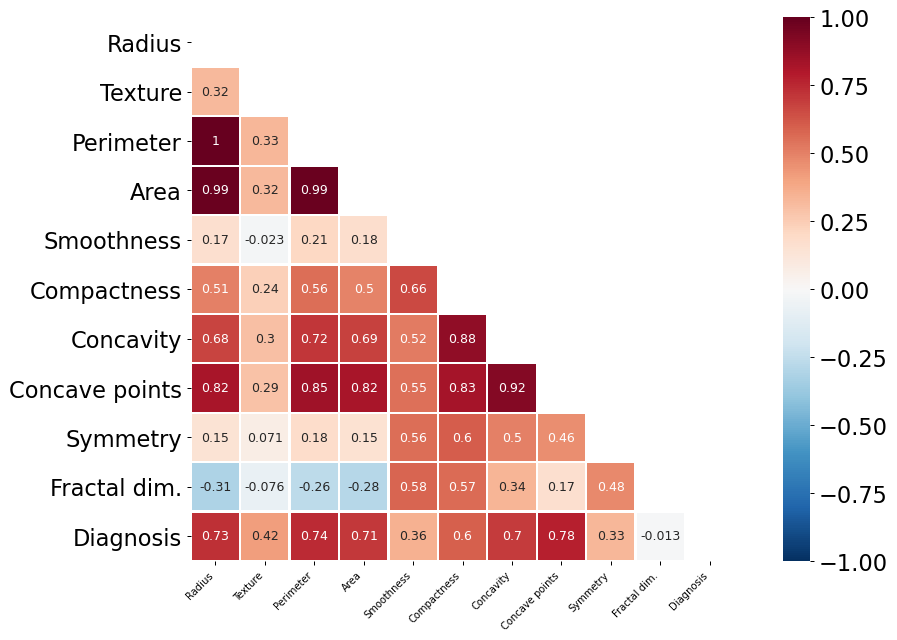

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

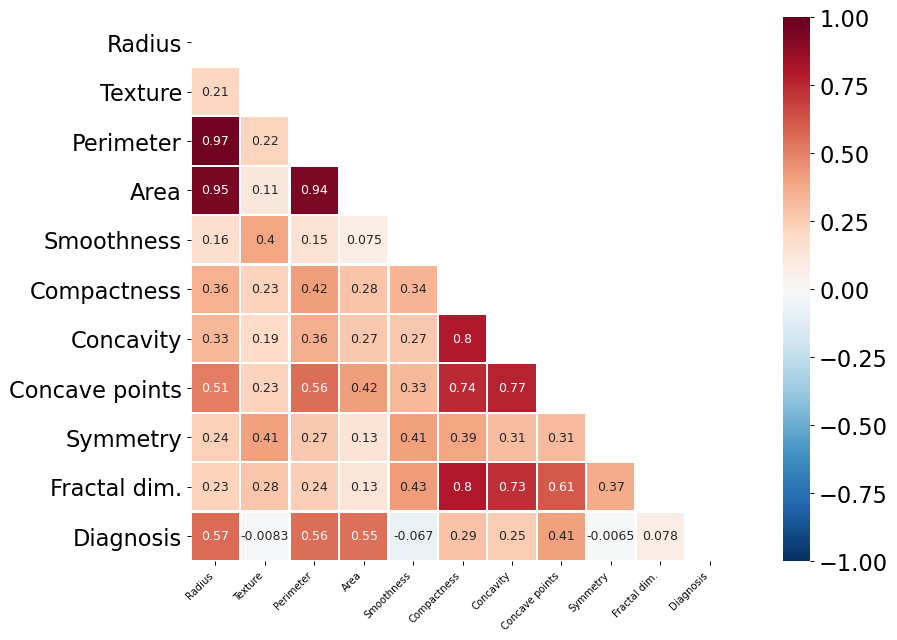

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

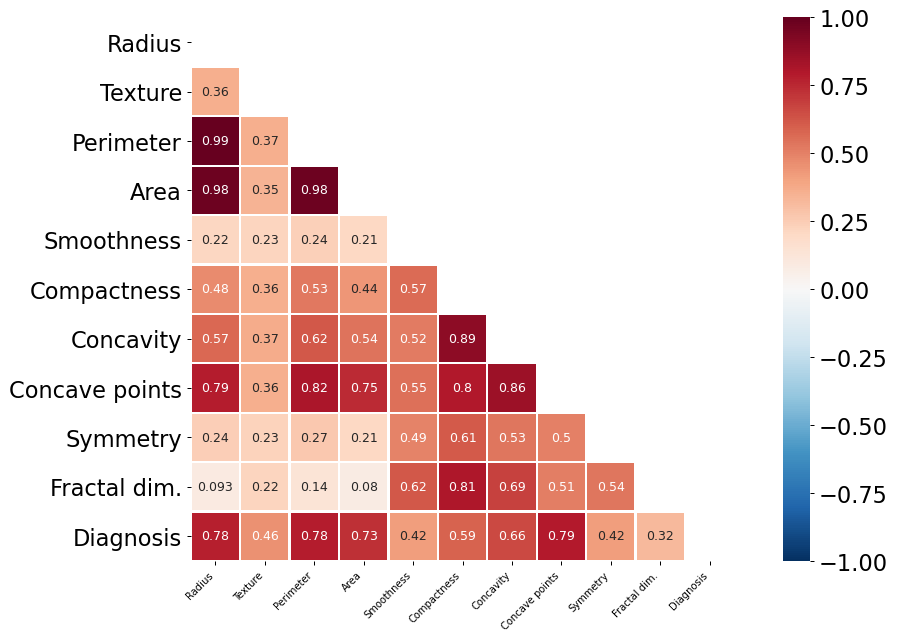

<IPython.core.display.Javascript object>

In [696]:
#@title

t = widgets.TabBar(["Mean", "SE", "Worst"])
plt.rcParams['figure.figsize'] = (14, 8)
class_full =  class_feat + ['Diagnosis']

with t.output_to(0):
    corr_full = df_mn.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 10}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_full)
    ax.set_yticklabels(class_full)
    plt.show()

with t.output_to(1):
    corr_full = df_se.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 10}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_full)
    ax.set_yticklabels(class_full)
    plt.show()

with t.output_to(2):
    corr_full = df_wt.corr(method='pearson')
    mask = np.triu( np.ones_like(corr_full, dtype=np.bool) )
    ax = sns.heatmap(corr_full, cmap='RdBu_r', vmin=-1.0, vmax=1.0, mask=mask, annot=True, square=True, linewidths=1.0, annot_kws={"size": 10}) #, cbar_kws={"shrink": 1.0})
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_xticklabels(class_full)
    ax.set_yticklabels(class_full)
    plt.show()


### $ \text{Feature selection} $

$(i)$ Based on the linear regression assumptions, the **independent variables** 
 should not be correlated with **each other**.\
  As can be seen, the Area feature has $\, 99 \% \,$ correlation score to the Radius and the Perimeter, apparently for \
being a circular shape - $f(r)$. Therefore the **redundant** features need to be removed in order to improve later\
 the model accuracy and reduce overfitting.

$(ii)$ Contrarily to $(i)$, here the correlation expresses the feature importance / relevance to the **target**. \
For example, the Radius, Texture, Area, Concavity and Concave points exhibit ($\leq 70 \% $) , while Fractal dimension $(\sim 1 \%)$. 

Using randomized decision trees [[$2$](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)] we can double check that finding :



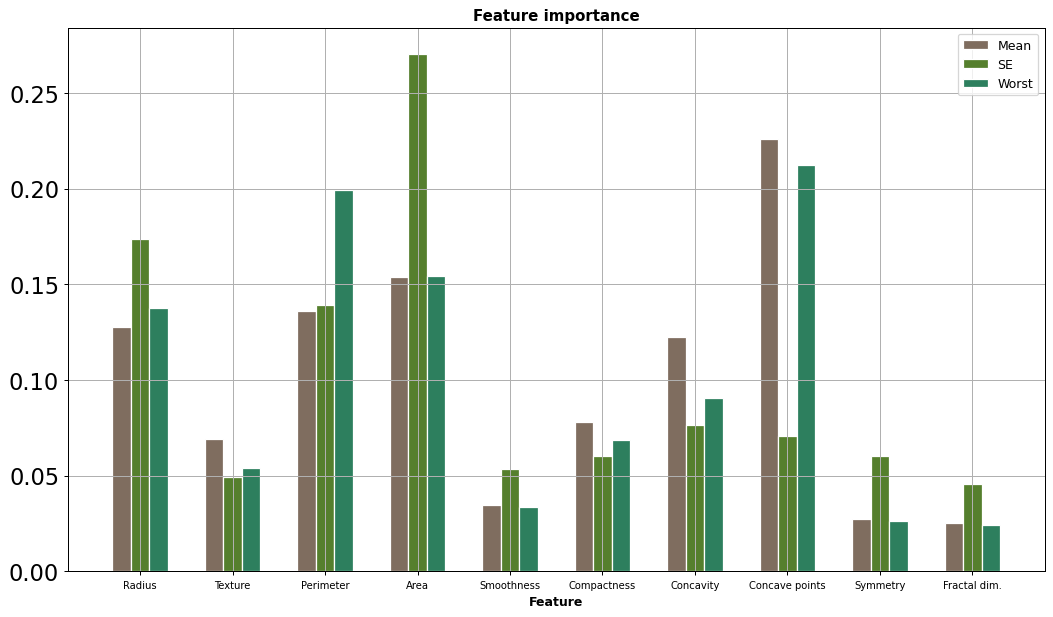

In [697]:
#@title
X1, X2, X3 = df_mn.iloc[:, :-1], df_se.iloc[:, :-1], df_wt.iloc[:, :-1]
y1, y2, y3 = df_mn.iloc[:, -1], df_se.iloc[:, -1], df_wt.iloc[:, -1]    #target column i.e price range

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model_1 = ExtraTreesClassifier()
model_2 = ExtraTreesClassifier()
model_3 = ExtraTreesClassifier()
model_1.fit(X1, y1), model_2.fit(X2, y2), model_3.fit(X3, y3)

bars1 = pd.Series(model_1.feature_importances_, index=X1.columns)
bars2 = pd.Series(model_2.feature_importances_, index=X2.columns)
bars3 = pd.Series(model_3.feature_importances_, index=X3.columns)

barWidth = 0.2
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.title('Feature importance', fontweight='bold')
plt.xlabel('Feature', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(class_feat))], [r for r in class_feat])
plt.rcParams['figure.figsize'] = (15, 6)
plt.legend(['Mean', 'SE', 'Worst'])
plt.show()


# ax = plt.subplot(111)
# ax.bar(class_feat, feat_imp_1, color='b', align='center')
# ax.bar(class_feat, feat_imp_2, color='y', align='center')
# ax.bar(class_feat, feat_imp_3, color='g', align='center')
# ax.legend(['Mean', 'SE', 'Worst'])


We can see that the mean and worst datasets exhibit a somewhat similar performance, while the SE dataset can be best explained by the area.

Elaborate on the need of PCA

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

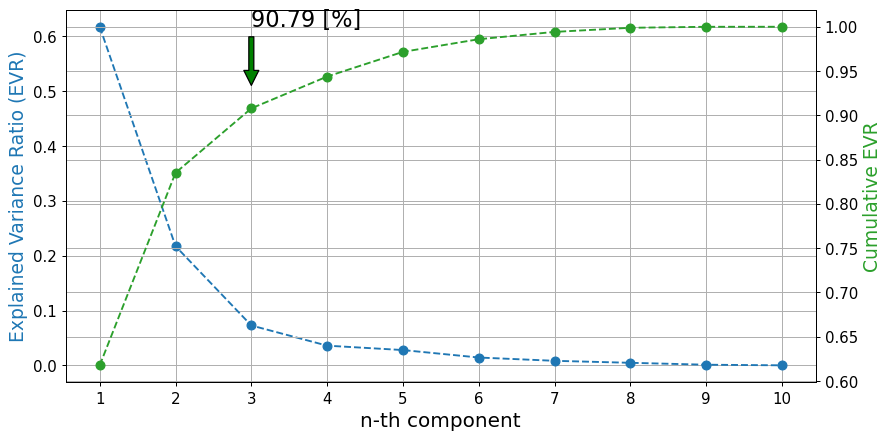

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

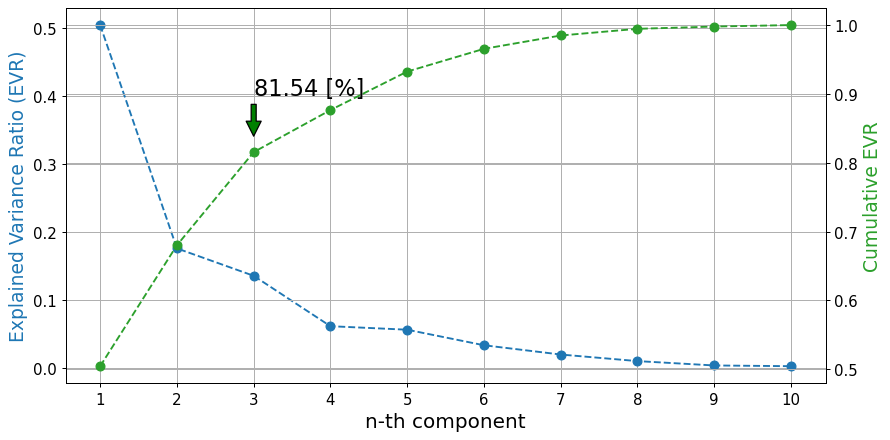

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

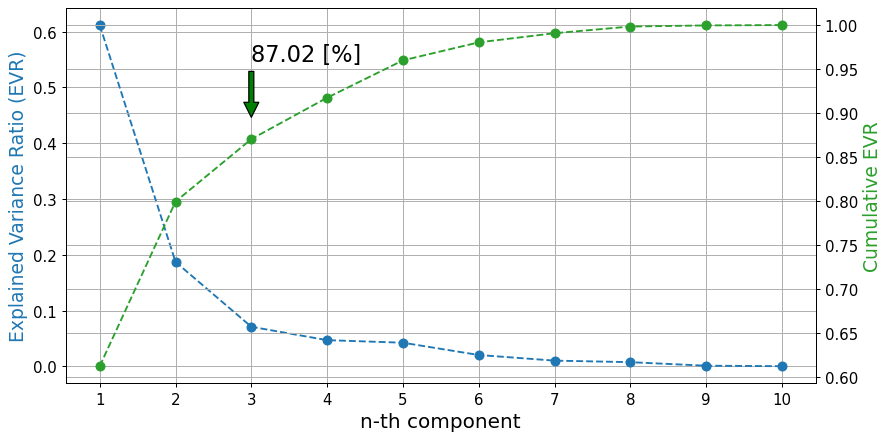

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

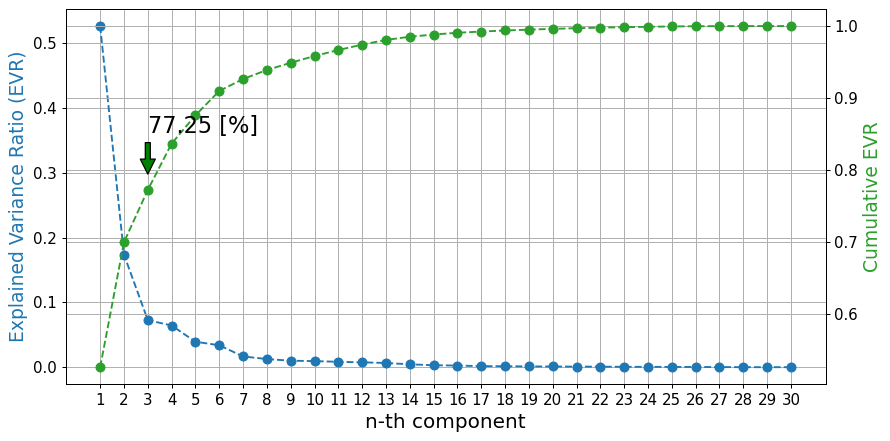

<IPython.core.display.Javascript object>

In [698]:
## @title
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# normalization the sub groups
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

plt.rcParams['figure.figsize'] = (10, 5)
class_full =  class_feat + ['Diagnosis']

# Initialize the PCA method
pca_0, pca_1, pca_2, pca_3 = PCA(), PCA(), PCA(), PCA()

# All Datasets
pca_0.fit(x_train_N)
pca_exp_0 = pca_0.explained_variance_ratio_

# Mean Dataset
pca_1.fit(x_train_N.iloc[:, [j-2 for j in ix_mn]])
pca_exp_1 = pca_1.explained_variance_ratio_

# SE Dataset
pca_2.fit(x_train_N.iloc[:, [j-2 for j in ix_se]])
pca_exp_2 = pca_2.explained_variance_ratio_

# Worst Dataset
pca_3.fit(x_train_N.iloc[:, [j-2 for j in ix_wt]])
pca_exp_3 = pca_3.explained_variance_ratio_

t_all = range(1, df.shape[1]-1)
t_solo = range(1, df_mn.shape[1])
Wgt = widgets.TabBar(['Mean', 'SE', 'Worst', 'All'])

def PCA_plot(t, pca_exp):
    # ---------------------------------------------- #
    # Instantiate the prinicipal (LHS) plot
    pca_cum = np.cumsum(pca_exp)
    fig, ax1 = plt.subplots()
    color = 'tab:blue'

    ax1.set_xlabel('n-th component', fontsize=16)
    ax1.set_ylabel('Explained Variance Ratio (EVR)', color=color, fontsize=15)
    ax1.plot(t, pca_exp, 'bo', color=color, markersize=7)
    ax1.plot(t, pca_exp, '--', color=color, linewidth=1.5)
    ax1.tick_params(axis="x", labelsize=12)
    ax1.tick_params(axis="y", labelsize=12)

    # ---------------------------------------------- #
    # Instantiate a second axes that shares the same x-axis
    ax2 = ax1.twinx()  
    color = 'tab:green'

    ax2.set_ylabel('Cumulative EVR', color=color, fontsize=15)  # we already handled the x-label with ax1
    ax2.plot(t, pca_cum, 'go', color=color, markersize=7)
    ax2.plot(t, pca_cum, '--', color=color, linewidth=1.5)
    ax2.tick_params(axis="y", labelsize=12)
    t_score, t_loc = pca_cum[2], pca_cum[2]*1.025
    ax2.annotate('%.2f '%(t_score*100)+'[%]', fontsize=18, xy =(3, t_loc), xytext =(3, t_loc*1.075), arrowprops = dict(facecolor ='green', shrink = 0.05),) 

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xticks(t)
    plt.show()


with Wgt.output_to(0):
    PCA_plot(t_solo, pca_exp_1)

with Wgt.output_to(1):
    PCA_plot(t_solo, pca_exp_2)

with Wgt.output_to(2):
    PCA_plot(t_solo, pca_exp_3)

with Wgt.output_to(3):
    PCA_plot(t_all,  pca_exp_0)


The case the exhibited the largest explaind variance ratio is the mean dataset, whose first (largest) 3 prinicipal\
 components manage to capture more than $90 \%$ of the variance. On the contrary, the general calculation of the all\
  30 components achieves much lower variance level using 3 PC.
Therefore, from now on we shall focus only on these :

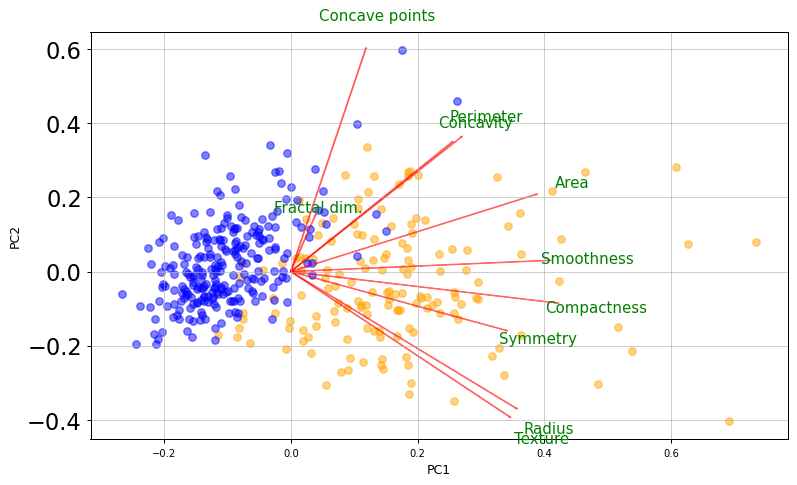

In [816]:
# #@title
from sklearn.preprocessing import StandardScaler

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
# xx = x_train_N.iloc[:, 2:]
xt = x_train_N.iloc[:, ix_mn]
scaler.fit(xt)
xt = scaler.transform(xt)
pca = PCA()
x_new = pca.fit_transform(xt)

def PCA_scatter(X, coeff, y_M, labels):
    
    n = coeff.shape[0]
    xs, ys = X[:,0], X[:,1]             # zs = X[:,2]
    scalex, scaley = 1.0/(xs.max() - xs.min()) , 1.0/(ys.max() - ys.min())
    # scalez = 1.0/(zs.max() - zs.min()) <-- 3D of Z
    
    # ---------- Scatter color by class ----------- #
    plt.scatter(xs[y_M] * scalex, ys[y_M] * scaley, c = 'orange', alpha=0.5) 
    plt.scatter(xs[1-y_M==True] * scalex, ys[1-y_M==True] * scaley, c = 'blue', alpha=0.5)
    # plt.scatter(xs * scalex, ys * scaley, c = 'blue')

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', fontsize=12, ha = 'center', va = 'center')
    
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid(linestyle='-', linewidth=0.5)

#Call the function. Use only the 2 PCs
y_M, y_B = y_train, 1-y_train
label_diag = pd.DataFrame(columns=['M', 'B'])
label_diag['M'], label_diag['B'] = y_train, 1-y_train
y_M = label_diag.iloc[:, 0]==True

pca_i = 2
PCA_scatter(x_new[:, 0:pca_i], np.transpose(pca.components_[0:pca_i, :]), y_M, class_feat)
plt.rcParams['figure.figsize'] = (10, 6)
plt.show()

Explain about orthogonality of principal components [[link](https://www.originlab.com/doc/Tutorials/Principal-Component-Analysis)] in context of 3D :

<center><img src=https://d2mvzyuse3lwjc.cloudfront.net/doc/en/Tutorial/images/Principal_Component_Analysis/3D_loading_plot.png?v=60217
 width="800px" style="width:500px"/></center>

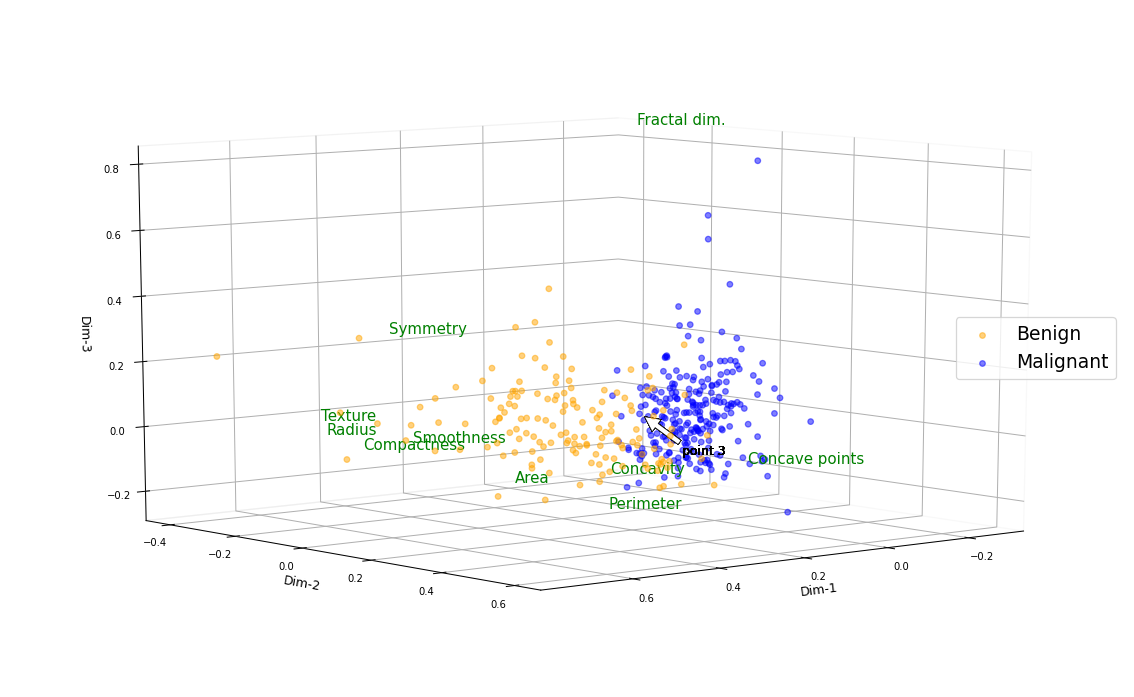

In [865]:

# #@title
from sklearn.preprocessing import StandardScaler
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.axes3d import Axes3D

def PCA_scatter(X, coeff, y_M, labels):
    
    y_B = 1-y_M==True           # Logical statement for 
    n = coeff.shape[0]
    xs, ys, zs = X[:,0], X[:,1], X[:,2]
    scalex, scaley, scalez = 1.0/(xs.max() - xs.min()) , 1.0/(ys.max() - ys.min()), 1.0/(zs.max() - zs.min())
    
    # ---------- Scatter color by class ----------- #
    ax.scatter(xs[y_M] * scalex, ys[y_M] * scaley, zs[y_M] * scalez, c = 'orange', alpha=0.5) 
    ax.scatter(xs[y_B] * scalex, ys[y_B] * scaley, zs[y_B] * scalez, c = 'blue', alpha=0.5)

    for i in range(n):
        ax.annotate3D('point 3',(0,0,0), xytext=(30,-30), textcoords='offset points', arrowprops = dict(ec='black', fc='white', lw=0.5))
        # ax.arrow(0, 0, 0, coeff[i,0], coeff[i,1], coeff[i,2], color = 'r', alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.0, coeff[i,2] * 1.0, labels[i], color = 'g', fontsize=12, ha = 'center', va = 'center')
    
    # plt.xlabel("PC{}".format(1))
    # plt.ylabel("PC{}".format(2))
    # plt.zlabel("PC{}".format(3))
    # plt.grid(linestyle='-', linewidth=0.5)


# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
# xx = x_train_N.iloc[:, 2:]
xt = x_train_N.iloc[:, ix_mn]
scaler.fit(xt)
xt = scaler.transform(xt)
pca = PCA()
x_new = pca.fit_transform(xt)

#Call the function. Use only the 2 PCs
y_M, y_B = y_train, 1-y_train
label_diag = pd.DataFrame(columns=['M', 'B'])
label_diag['M'], label_diag['B'] = y_train, 1-y_train
y_M = label_diag.iloc[:, 0]==True

pca_i = 3
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
PCA_scatter(x_new[:, 0:pca_i], np.transpose(pca.components_[0:pca_i, :]), y_M, class_feat)

plt.rcParams['figure.figsize'] = (8, 5)
ax.view_init(elev=10., azim=50)
ax.legend(['Benign', 'Malignant'], fontsize=15, loc=5)
ax.set_xlabel('Dim-1'), ax.set_ylabel('Dim-2'), ax.set_zlabel('Dim-3')
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = False, False, False
plt.show()



3D attempt with red arrows :

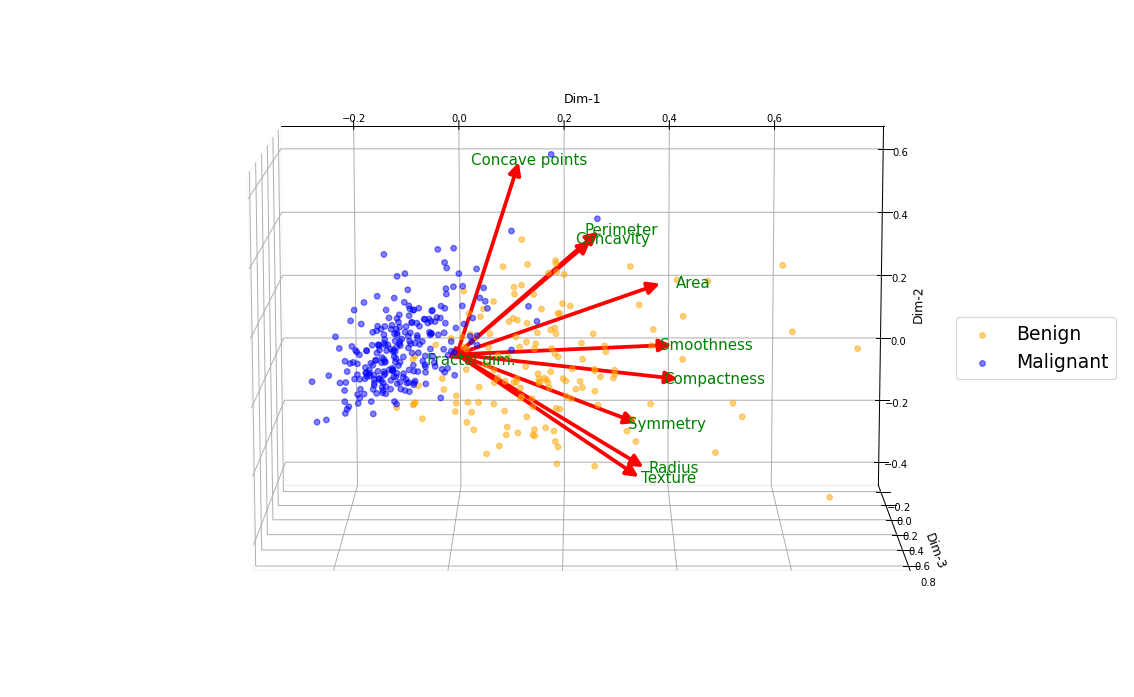

In [919]:

# #@title
from sklearn.preprocessing import StandardScaler
from matplotlib.text import Annotation
from mpl_toolkits.mplot3d.axes3d import Axes3D

def PCA_scatter(X, coeff, y_M, labels):
    
    y_B = 1-y_M==True           # Logical statement for 
    n = coeff.shape[0]
    xs, ys, zs = X[:,0], X[:,1], X[:,2]
    scalex, scaley, scalez = 1.0/(xs.max() - xs.min()) , 1.0/(ys.max() - ys.min()), 1.0/(zs.max() - zs.min())
    
    # ---------- Scatter color by class ----------- #
    ax.scatter(xs[y_M] * scalex, ys[y_M] * scaley, zs[y_M] * scalez, c = 'orange', alpha=0.5) 
    ax.scatter(xs[y_B] * scalex, ys[y_B] * scaley, zs[y_B] * scalez, c = 'blue', alpha=0.5)

    for i in range(n):
        mean_x, mean_y, mean_z = coeff[i,0], coeff[i,1], coeff[i,2]
        a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], 
                [mean_z, 0.0], mutation_scale=20, 
                lw=3, arrowstyle="<|-", color="r")
        ax.add_artist(a)

        # ax.annotate3D('point 3',(0,0,0), xytext=(30,-30), textcoords='offset points', arrowprops = dict(ec='black', fc='white', lw=0.5))
        # ax.arrow(0, 0, 0, coeff[i,0], coeff[i,1], coeff[i,2], color = 'r', alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.0, coeff[i,2] * 1.0, labels[i], color = 'g', fontsize=12, ha = 'center', va = 'center')
    
    # plt.xlabel("PC{}".format(1))
    # plt.ylabel("PC{}".format(2))
    # plt.zlabel("PC{}".format(3))
    # plt.grid(linestyle='-', linewidth=0.5)


# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
# xx = x_train_N.iloc[:, 2:]
xt = x_train_N.iloc[:, ix_mn]
scaler.fit(xt)
xt = scaler.transform(xt)
pca = PCA()
x_new = pca.fit_transform(xt)

#Call the function. Use only the 2 PCs
y_M, y_B = y_train, 1-y_train
label_diag = pd.DataFrame(columns=['M', 'B'])
label_diag['M'], label_diag['B'] = y_train, 1-y_train
y_M = label_diag.iloc[:, 0]==True

pca_i = 3
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
PCA_scatter(x_new[:, 0:pca_i], np.transpose(pca.components_[0:pca_i, :]), y_M, class_feat)

plt.rcParams['figure.figsize'] = (8, 5)
# ax.view_init(elev=None, azim=45) # ! BEST !
ax.view_init(elev=100, azim=270) # PC1 || PC2
# ax.set_top_view()

ax.legend(['Benign', 'Malignant'], fontsize=15, loc=5)
ax.set_xlabel('Dim-1'), ax.set_ylabel('Dim-2'), ax.set_zlabel('Dim-3')
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = False, False, False
plt.show()


### $ \text{Factor analysis} $

Some of the variables are highly correlated, in an extent that implies redundancy. Others are less correlated, 
"*Garbage in, garbage out*"

**Multicollinearity** - The existence of data that is additional to the actual data, such as copies or linear relationship : $\,x_{i,2} = \lambda_0 + \lambda_1 x_{i,1}$ \
Before diving deep into descriptive statistics, it is recommended to examine which predictors are **redundant** with respect to others.

There are two options for the optimal feature selection : Principal component analysis (PCA) or Recursive feature elimination (RFE). 

Find the most relevant (optimal) features can assist will allow the algorithms to run more efficiently in terms of time complexity. 



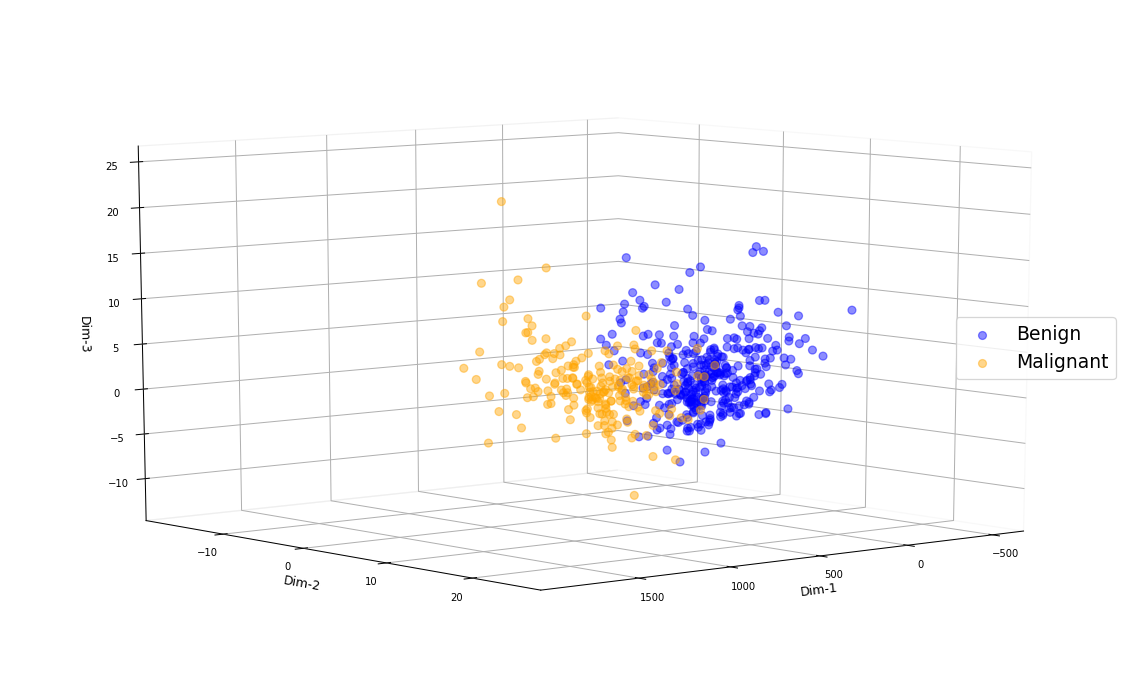

In [810]:

num_PCA = 3
df_PCA = pd.DataFrame(columns = ['Dim-1', 'Dim-2', 'Dim-3'])

pca = PCA(n_components=num_PCA)
pca_result = pca.fit_transform(df_mn[class_feat].values)
df_PCA['Dim-1'] = pca_result[:,0]
df_PCA['Dim-2'] = pca_result[:,1] 
df_PCA['Dim-3'] = pca_result[:,2] 
df_PCA['diagnosis'] = df_mn['diagnosis']
# print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# Labels = ['Benign', 'Malignant']

df_PCA_B = df_PCA[ df_PCA['diagnosis']==0]
df_PCA_M = df_PCA[ df_PCA['diagnosis']==1]

ax = plt.figure(figsize=(16,10)).gca(projection='3d')

ax.scatter(xs=df_PCA_B['Dim-1'], ys=df_PCA_B['Dim-2'], zs=df_PCA_B['Dim-3'], c='blue',   s=40, alpha = 0.45)
ax.scatter(xs=df_PCA_M['Dim-1'], ys=df_PCA_M['Dim-2'], zs=df_PCA_M['Dim-3'], c='orange', s=40, alpha = 0.45)
ax.view_init(elev=10., azim=50)
ax.legend(['Benign', 'Malignant'], fontsize=15, loc=5)
ax.set_xlabel('Dim-1'), ax.set_ylabel('Dim-2'), ax.set_zlabel('Dim-3')
ax.xaxis.pane.fill, ax.yaxis.pane.fill, ax.zaxis.pane.fill = False, False, False


$!-!-!$
---
1. Create interactive motion of sample space
2. General clustering of sub-groups
3. Choose between feature selection and PCA

In [ ]:

# import ipywidgets as widgets
# widgets.IntSlider(value=45, min=0, max=360, step=5, description='Angle:', disabled=False, continuous_update=True,
#     orientation='horizontal', readout=True, readout_format='d')

# ax.view_init(elev=15., azim=3) # elev \in [0 , 30] ; angle \in [0, 360]

# for angle in range(0, 360):
#     ax.view_init(15, angle)
#     plt.draw()
#     plt.pause(.1)
#     plt.show()


Train-Test split

Modelling

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()


In [ ]:
%%html
<link rel="stylesheet" href="../css/style.css"> <!--Setting styles - You can simply ignore this line-->
<marquee style='width: 30%; color: blue;'><b> Finito la Commedia ! </b></marquee>
<marquee style='width: 30%; color: orange;'><b> Finita la Commedia ! </b></marquee>